<a href="https://colab.research.google.com/github/swapnil-23/BTECH_ML_FINALYR/blob/main/ML_FinalYr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install jinja2
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.3.7 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.0 MB/s eta 0:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import jinja2
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [4]:
## importing the ticker
# Take user input for equity symbol
# Take user input for equity symbol
symbol = input('Enter your choice of equity portfolio: ')

# Take user input for start and end dates
start_date = input('Enter the start date (YYYY-MM-DD): ')
end_date = input('Enter the end date (YYYY-MM-DD): ')

# Download stock data using yfinance
df = yf.download(symbol, start=start_date, end=end_date)

# Reset index and convert 'Date' to datetime
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


Enter your choice of equity portfolio: TSLA
Enter the start date (YYYY-MM-DD): 2022-04-23
Enter the end date (YYYY-MM-DD): 2023-04-23
[*********************100%%**********************]  1 of 1 completed


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
data = df.copy()

# storing the feature attributes in the X array and adding a target column
X = np.array(data[['Date', 'Open', 'Close']])

## storing the closing values in the y
y = data['Close'].values

## splitting the dataset into 85% training and 15% testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15, random_state = 0, shuffle = False)

In [7]:
## getting the train and transforming it into dataframe

train_data = pd.DataFrame(X_train, columns = ['Date', 'Open', 'Close'])
train_data.head(5)

,Date,Open,Close
0,2022-04-25,326.323334,332.67334
1,2022-04-26,331.809998,292.140015
2,2022-04-27,299.526672,293.83667
3,2022-04-28,299.993347,292.503326
4,2022-04-29,300.75,290.253326


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_2, *['Open', 'Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_3, *['Date', 'count()', 'Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['Date', 'count()', 'Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['Date', 'count()', 'Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['Date', 'count()', 'Close'], **{})
chart

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,326.323334,336.206665,325.100006,332.673340,332.673340,68341200
1,2022-04-26,331.809998,333.333344,291.666656,292.140015,292.140015,136133700
2,2022-04-27,299.526672,306.000000,292.453339,293.836670,293.836670,76956300
3,2022-04-28,299.993347,300.000000,273.899994,292.503326,292.503326,124948500
4,2022-04-29,300.750000,311.466675,290.000000,290.253326,290.253326,88133100
...,...,...,...,...,...,...,...
245,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200
246,2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000
247,2023-04-19,179.100006,183.500000,177.649994,180.589996,180.589996,125732700
248,2023-04-20,166.169998,169.699997,160.559998,162.990005,162.990005,210970800


In [9]:
# Initialize pycaret setup
setUp = setup(data=df, target='Close', session_id=123, use_gpu=True)

# Train linear regression model
lr_model = create_model('lr')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(250, 7)"
4,Transformed data shape,"(250, 9)"
5,Transformed train set shape,"(175, 9)"
6,Transformed test set shape,"(75, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
## implementing the LSTM model for the given equity
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [11]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

238

In [12]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.81950963],
       [0.82706465],
       [0.82112742],
       [0.81110842],
       [0.85887315],
       [0.86823905],
       [0.93261297],
       [0.81484883],
       [0.80352364],
       [0.68694706],
       [0.706139  ],
       [0.60811614],
       [0.59921036],
       [0.66094221],
       [0.59382234],
       [0.64909751],
       [0.57221099],
       [0.57163209],
       [0.50406697],
       [0.52039419],
       [0.45101825],
       [0.49649708],
       [0.56912367],
       [0.64615866],
       [0.64412511],
       [0.61757105],
       [0.6689723 ],
       [0.56291928],
       [0.579677  ],
       [0.58237845],
       [0.59564804],
       [0.58602978],
       [0.55273701],
       [0.47929405],
       [0.50224127],
       [0.55616575],
       [0.4675533 ],
       [0.48385082],
       [0.57414058],
       [0.56991035],
       [0.56538326],
       [0.61274711],
       [0.60924417],
       [0.5546666 ],
       [0.53608325],
       [0.51819743],
       [0.530

In [13]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.        , 0.81950963, 0.82706465, 0.82112742, 0.81110842,
       0.85887315, 0.86823905, 0.93261297, 0.81484883, 0.80352364,
       0.68694706, 0.706139  , 0.60811614, 0.59921036, 0.66094221,
       0.59382234, 0.64909751, 0.57221099, 0.57163209, 0.50406697,
       0.52039419, 0.45101825, 0.49649708, 0.56912367, 0.64615866,
       0.64412511, 0.61757105, 0.6689723 , 0.56291928, 0.579677  ,
       0.58237845, 0.59564804, 0.58602978, 0.55273701, 0.47929405,
       0.50224127, 0.55616575, 0.4675533 , 0.48385082, 0.57414058,
       0.56991035, 0.56538326, 0.61274711, 0.60924417, 0.5546666 ,
       0.53608325, 0.51819743, 0.53062103, 0.55646261, 0.55052545,
       0.60756693, 0.6352639 , 0.56214749, 0.55647749, 0.57415539,
       0.57982546, 0.58763283, 0.58977019, 0.61196044, 0.62073263])]
[0.7285222082333385]

[array([1.        , 0.81950963, 0.82706465, 0.82112742, 0.81110842,
       0.85887315, 0.86823905, 0.93261297, 0.81484883, 0.80352364,
       0.68694706, 0.706139  , 0.608

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
178/178 [==============================] - 17s 46ms/step - loss: 0.0175
Epoch 2/30
178/178 [==============================] - 8s 42ms/step - loss: 0.0048
Epoch 3/30
178/178 [==============================] - 8s 47ms/step - loss: 0.0054
Epoch 4/30
178/178 [==============================] - 6s 35ms/step - loss: 0.0039
Epoch 5/30
178/178 [==============================] - 9s 49ms/step - loss: 0.0038
Epoch 6/30
178/178 [==============================] - 7s 39ms/step - loss: 0.0041
Epoch 7/30
178/178 [==============================] - 9s 51ms/step - loss: 0.0032
Epoch 8/30
178/178 [==============================] - 7s 38ms/step - loss: 0.0031
Epoch 9/30
178/178 [==============================] - 9s 49ms/step - loss: 0.0029
Epoch 10/30
178/178 [==============================] - 7s 37ms/step - loss: 0.0024
Epoch 11/30
178/178 [==============================] - 10s 55ms/step - loss: 0.0032
Epoch 12/30
178/178 [==============================] - 7s 39ms/step - loss: 0.0026
Epoch 13/30

In [15]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 4s 4s/step


6.096521399940563

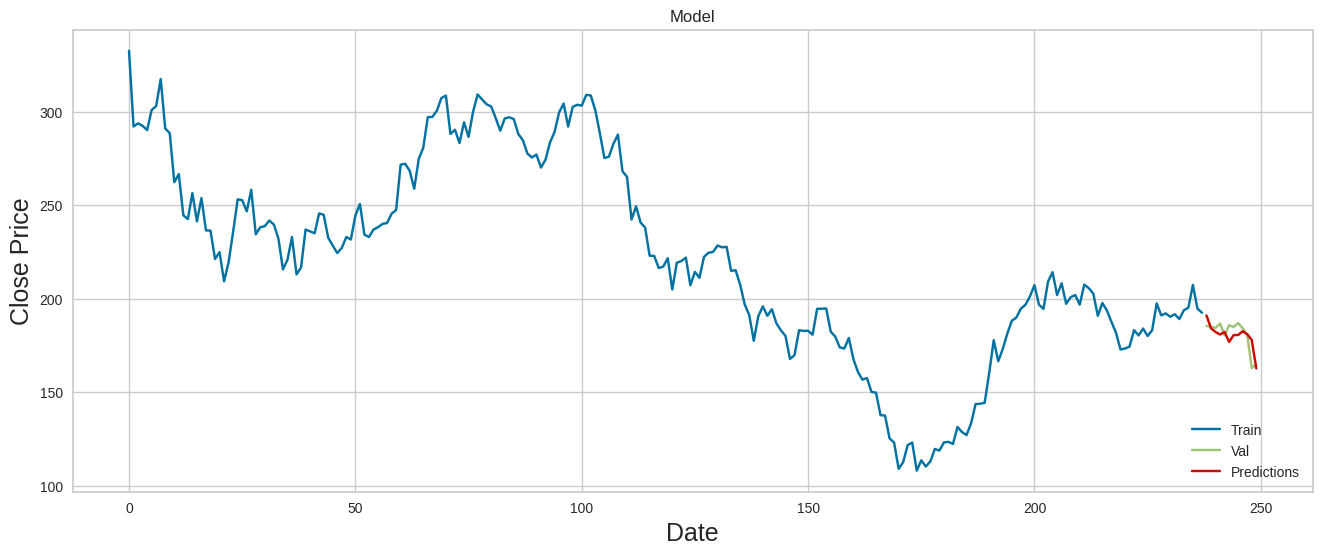

In [16]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
# Show the valid and predicted prices
valid.head()

,Close,Predictions
238,185.520004,191.113678
239,185.059998,184.268753
240,184.509995,182.279480
241,186.789993,180.945724
242,180.539993,182.279099
